In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import torch

from torch import nn, optim

In [2]:
data = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")

data = data.iloc[:,1:53]

data.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


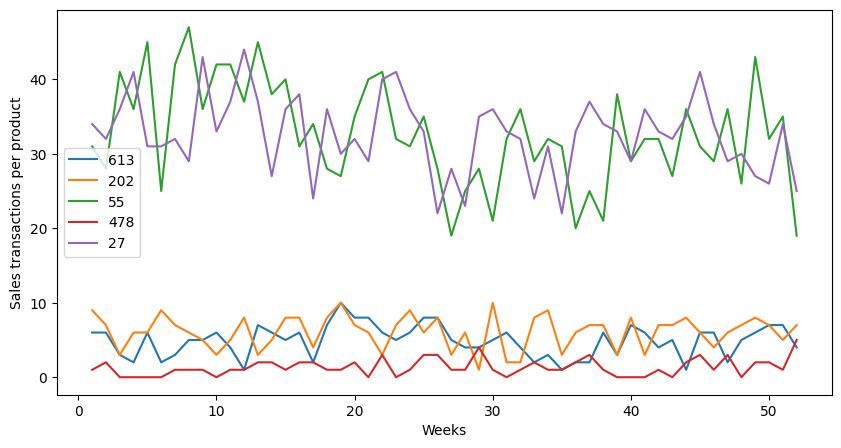

In [4]:
plot_data = data.sample(5, random_state=0)

x = range(1,53)

plt.figure(figsize=(10,5))

for i,row in plot_data.iterrows():
    plt.plot(x,row)

plt.legend(plot_data.index)

plt.xlabel("Weeks")

plt.ylabel("Sales transactions per product")

plt.show()

In [6]:
data_train = data.iloc[:,:-1]

inputs = torch.Tensor(data_train.values).unsqueeze(1)
targets_pre  = data.iloc[:,-1]

In [21]:
targets = data.iloc[:, 1:]
targets = torch.Tensor(targets.values)

In [22]:
targets.head()

AttributeError: 'Tensor' object has no attribute 'head'

In [23]:
class RNN(nn.Module):
    def  __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first = True)
        self.hidden_size = hidden_size
        self.output = nn.Linear(hidden_size, 1)
    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = out.view(-1, self.hidden_size)
        out = self.output(out)
        return out, hidden

In [24]:
model = RNN(data_train.shape[1], 10, 1)

In [25]:
loss_function = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10000

In [28]:
losses = []

for i in range(1, epochs+1):

    hidden = None

    pred, hidden = model(inputs, hidden)
    target = targets[:,-1].unsqueeze(1)

    loss = loss_function(targets, pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    losses.append(loss.item())

    if i%1000 == 0:

        print("epoch: ", i, "=... Loss function: ", losses[-1])

torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([8

C:\Users\devan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([811, 1])) that is different to the input size (torch.Size([811, 51])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([811, 1])
torch.Size([8

In [29]:
print(shape)

NameError: name 'x_train' is not defined